In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import os


In [2]:
nn = np.load('../results/nn.npy')
## nn has shape (8407, 1), make into (8408,), fill with mean
# nn = nn.flatten()
# nn = np.append(nn, np.mean(nn))
nn.shape

(8408,)

In [5]:
np.save('../results/nn.npy', nn)

In [6]:
lg = np.load("../results/logreg.npy", allow_pickle=True)
lg.shape

(8408,)

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Load ground truth labels
truth = np.load("../results/truth.npy")

# Base path for result files
file_path = "../results/"

# Names of the result files
file_names = ["lda.npy", "randomforest.npy", "qda.npy", "cnn.npy", "nn.npy", "logreg.npy"]

# Generate the full paths
result_files = [file_path + name for name in file_names]

# Initialize lists to store results
model_names = [name.split('.')[0] for name in file_names]
accuracy = []
precision = []
recall = []
f1 = []
auc = []
fnr = []  # False Negative Rate

# Process each result file
for result_file in result_files:
    # Load predictions
    predictions = np.load(result_file)
    
    # Convert continuous predictions to binary (threshold = 0.5)
    binary_predictions = (predictions >= 0.5).astype(int)
    
    # Compute metrics
    accuracy.append(accuracy_score(truth, binary_predictions))
    precision.append(precision_score(truth, binary_predictions, zero_division=0))
    recall.append(recall_score(truth, binary_predictions, zero_division=0))
    f1.append(f1_score(truth, binary_predictions, zero_division=0))
    auc.append(roc_auc_score(truth, predictions))  # AUC uses continuous predictions

    # Calculate False Negative Rate (FNR)
    false_negatives = ((truth == 1) & (binary_predictions == 0)).sum()
    total_positives = (truth == 1).sum()
    fnr.append(false_negatives / total_positives if total_positives > 0 else 0)

# Create a DataFrame for the results
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1,
    "AUC": auc,
    "FNR": fnr
})

# # Display the DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Model Performance Metrics with FNR", dataframe=metrics_df)

# # Save results to a CSV file if needed
# metrics_df.to_csv("../results/model_metrics_with_fnr.csv", index=False)


In [7]:
metrics_df

,Model,Accuracy,Precision,Recall,F1,AUC,FNR
0,lda,0.888202,0.123563,0.837662,0.215359,0.938014,0.162338
1,randomforest,0.986323,0.819672,0.324675,0.465116,0.973977,0.675325
2,qda,0.921979,0.150418,0.701299,0.247706,0.920253,0.298701
3,cnn,0.957778,0.284797,0.863636,0.428341,0.981032,0.136364
4,nn,0.979424,0.443114,0.480519,0.461059,0.968296,0.519481
5,logreg,0.893316,0.128871,0.837662,0.223377,0.943045,0.162338


In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Load ground truth labels
truth = np.load("../train_test_perturbed/y_test.npy")

# Base path for result files
file_path = "../results_perturbed/"

# Names of the result files
file_names = [ "cnn.npy", "logreg.npy"]

# Generate the full paths
result_files = [file_path + name for name in file_names]

# Initialize lists to store results
model_names = [name.split('.')[0] for name in file_names]
accuracy = []
precision = []
recall = []
f1 = []
auc = []
fnr = []  # False Negative Rate

# Process each result file
for result_file in result_files:
    # Load predictions
    predictions = np.load(result_file)
    
    # Convert continuous predictions to binary (threshold = 0.5)
    binary_predictions = (predictions >= 0.5).astype(int)
    
    # Compute metrics
    accuracy.append(accuracy_score(truth, binary_predictions))
    precision.append(precision_score(truth, binary_predictions, zero_division=0))
    recall.append(recall_score(truth, binary_predictions, zero_division=0))
    f1.append(f1_score(truth, binary_predictions, zero_division=0))
    auc.append(roc_auc_score(truth, predictions))  # AUC uses continuous predictions

    # Calculate False Negative Rate (FNR)
    false_negatives = ((truth == 1) & (binary_predictions == 0)).sum()
    total_positives = (truth == 1).sum()
    fnr.append(false_negatives / total_positives if total_positives > 0 else 0)

# Create a DataFrame for the results
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1,
    "AUC": auc,
    "FNR": fnr
})

In [3]:
metrics_df

,Model,Accuracy,Precision,Recall,F1,AUC,FNR
0,cnn,0.975381,0.401487,0.701299,0.510638,0.979852,0.298701
1,logreg,0.895219,0.130214,0.831169,0.225154,0.946237,0.168831


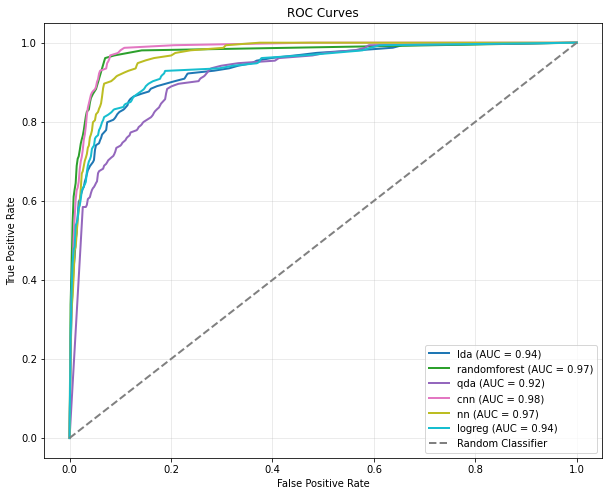

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
from scipy.interpolate import interp1d

# Load ground truth labels
truth = np.load("../results/truth.npy")

# Base path for result files
file_path = "../results/"

# Names of the result files
file_names = ["lda.npy", "randomforest.npy", "qda.npy", "cnn.npy", "nn.npy", "logreg.npy"]

# Generate the full paths
result_files = [file_path + name for name in file_names]

# Initialize a plot for ROC curves
plt.figure(figsize=(10, 8))

# Colors for different ROC curves
colors = plt.cm.tab10(np.linspace(0, 1, len(result_files)))

# Loop through each result file
for idx, result_file in enumerate(result_files):
    # Load predictions
    predictions = np.load(result_file)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(truth, predictions)
    roc_auc = auc(fpr, tpr)

    # Remove duplicates from fpr
    fpr, unique_indices = np.unique(fpr, return_index=True)
    tpr = tpr[unique_indices]

    # Smooth the ROC curve using linear interpolation
    fpr_dense = np.linspace(fpr.min(), fpr.max(), 500)  # Generate dense FPR points
    tpr_smooth = interp1d(fpr, tpr, kind="linear")(fpr_dense)  # Linear interpolation

    # Extract the base name for the label
    name = os.path.splitext(os.path.basename(result_file))[0]

    # Plot smoothed ROC curve with name as label
    plt.plot(fpr_dense, tpr_smooth, color=colors[idx], lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Random Classifier")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [12]:
# do confusion matrix for lda and linear regression
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification
# Load predictions
lda = np.load("../results/lda.npy")
logreg = np.load("../results/logreg.npy")

# Compute confusion matrices
cm_lda = confusion_matrix(truth, lda > 0.5)
cm_logreg = confusion_matrix(truth, logreg > 0.5)

# Display confusion matrices
print("LDA Confusion Matrix:")
print(cm_lda)
print("\nLogistic Regression Confusion Matrix:")
print(cm_logreg)

LDA Confusion Matrix:
[[7339  915]
 [  25  129]]

Logistic Regression Confusion Matrix:
[[7382  872]
 [  25  129]]


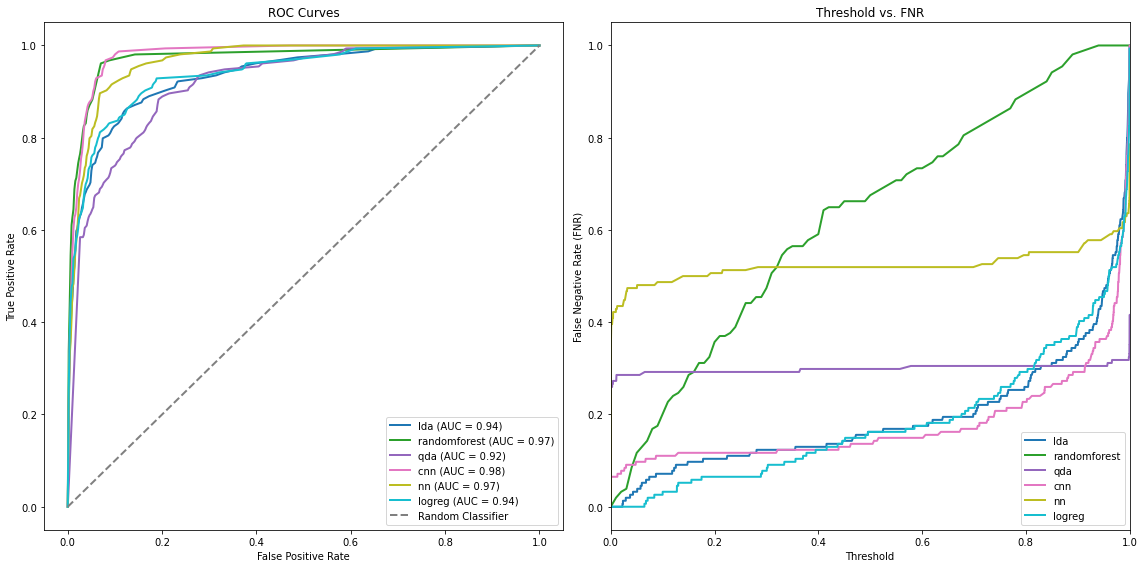

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
from scipy.interpolate import interp1d

# Load ground truth labels
truth = np.load("../results/truth.npy")

# Base path for result files
file_path = "../results/"
file_names = ["lda.npy", "randomforest.npy", "qda.npy", "cnn.npy", "nn.npy", "logreg.npy"]
result_files = [file_path + name for name in file_names]

# Initialize subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Colors for different curves
colors = plt.cm.tab10(np.linspace(0, 1, len(result_files)))

# Subplot 1: ROC Curves
for idx, result_file in enumerate(result_files):
    # Load predictions
    predictions = np.load(result_file)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(truth, predictions)
    roc_auc = auc(fpr, tpr)

    # Remove duplicates from fpr
    fpr, unique_indices = np.unique(fpr, return_index=True)
    tpr = tpr[unique_indices]

    # Smooth the ROC curve using linear interpolation
    fpr_dense = np.linspace(fpr.min(), fpr.max(), 500)  # Dense FPR points
    tpr_smooth = interp1d(fpr, tpr, kind="linear")(fpr_dense)  # Linear interpolation

    # Extract the base name for labeling
    name = os.path.splitext(os.path.basename(result_file))[0]

    # Plot smoothed ROC curve
    axes[0].plot(fpr_dense, tpr_smooth, color=colors[idx], lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Customize Subplot 1
axes[0].plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Random Classifier")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curves")
axes[0].legend(loc="lower right")

# Subplot 2: Threshold vs. FNR
for idx, result_file in enumerate(result_files):
    # Load predictions
    predictions = np.load(result_file)

    # Compute ROC curve and thresholds
    fpr, tpr, thresholds = roc_curve(truth, predictions)

    # Calculate FNR
    fnrs = [1 - tpr[i] for i in range(len(tpr))]  # FNR = 1 - TPR

    # Extract the base name for labeling
    name = os.path.splitext(os.path.basename(result_file))[0]

    # Plot Threshold vs. FNR
    axes[1].plot(thresholds, fnrs, label=name, color=colors[idx], lw=2)

# Customize Subplot 2
axes[1].set_xlim([0, 1])
axes[1].set_xlabel("Threshold")
axes[1].set_ylabel("False Negative Rate (FNR)")
axes[1].set_title("Threshold vs. FNR")
axes[1].legend(loc="lower right")

# Adjust layout and show the plot
plt.tight_layout()
# Save the plot as a PDF
plt.savefig("../Image/roc_and_threshold_vs_fnr.pdf")
plt.show()


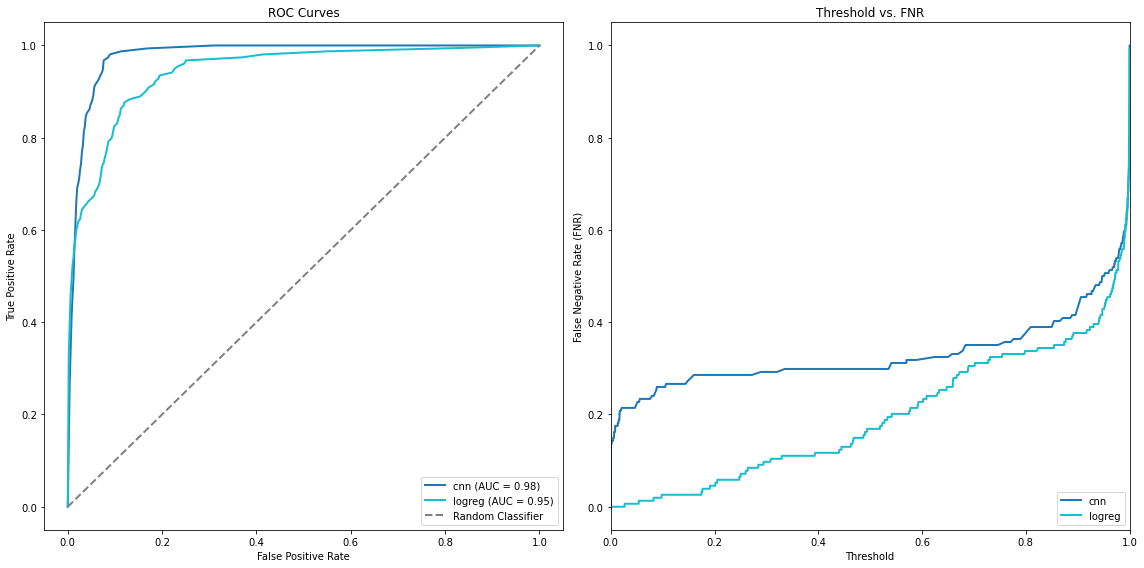

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
from scipy.interpolate import interp1d
# Load ground truth labels
truth = np.load("../train_test_perturbed/y_test.npy")

# Base path for result files
file_path = "../results_perturbed/"

# Names of the result files
file_names = [ "cnn.npy", "logreg.npy"]
result_files = [file_path + name for name in file_names]

# Initialize subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

# Colors for different curves
colors = plt.cm.tab10(np.linspace(0, 1, len(result_files)))

# Subplot 1: ROC Curves
for idx, result_file in enumerate(result_files):
    # Load predictions
    predictions = np.load(result_file)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(truth, predictions)
    roc_auc = auc(fpr, tpr)

    # Remove duplicates from fpr
    fpr, unique_indices = np.unique(fpr, return_index=True)
    tpr = tpr[unique_indices]

    # Smooth the ROC curve using linear interpolation
    fpr_dense = np.linspace(fpr.min(), fpr.max(), 500)  # Dense FPR points
    tpr_smooth = interp1d(fpr, tpr, kind="linear")(fpr_dense)  # Linear interpolation

    # Extract the base name for labeling
    name = os.path.splitext(os.path.basename(result_file))[0]

    # Plot smoothed ROC curve
    axes[0].plot(fpr_dense, tpr_smooth, color=colors[idx], lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Customize Subplot 1
axes[0].plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Random Classifier")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curves")
axes[0].legend(loc="lower right")

# Subplot 2: Threshold vs. FNR
for idx, result_file in enumerate(result_files):
    # Load predictions
    predictions = np.load(result_file)

    # Compute ROC curve and thresholds
    fpr, tpr, thresholds = roc_curve(truth, predictions)

    # Calculate FNR
    fnrs = [1 - tpr[i] for i in range(len(tpr))]  # FNR = 1 - TPR

    # Extract the base name for labeling
    name = os.path.splitext(os.path.basename(result_file))[0]

    # Plot Threshold vs. FNR
    axes[1].plot(thresholds, fnrs, label=name, color=colors[idx], lw=2)

# Customize Subplot 2
axes[1].set_xlim([0, 1])
axes[1].set_xlabel("Threshold")
axes[1].set_ylabel("False Negative Rate (FNR)")
axes[1].set_title("Threshold vs. FNR")
axes[1].legend(loc="lower right")

# Adjust layout and show the plot
plt.tight_layout()
# Save the plot as a PDF
plt.savefig("../Image/roc_and_threshold_perturbed.pdf")
plt.show()
